In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [4]:
# Leer datos de temperaturas de Madrid entre 1920 a 2018 obtenidos de NOAA 
noaa = pd.read_csv('201902_noaa_1597075.csv',encoding = 'iso-8859-1',delimiter = ',')
noaa.head()

,station,name,date,tavg,tmax,tmin
0,SPE00120296,"MADRID GETAFE, SP",1951-01,41.4,49.2,33.6
1,SPE00120296,"MADRID GETAFE, SP",1951-02,41.7,48.0,35.4
2,SPE00120296,"MADRID GETAFE, SP",1951-03,48.2,57.1,39.3
3,SPE00120296,"MADRID GETAFE, SP",1951-04,53.1,63.8,42.3
4,SPE00120296,"MADRID GETAFE, SP",1951-05,54.4,64.5,44.3


In [5]:
# Elegimos la estación de Retiro porque es la que más profundidad histórica nos da. 
noaa.sort_values(['date'], ascending = True, inplace = True)
retiro = noaa[noaa['station'] == 'SP000003195']

In [7]:
x = retiro['date'].unique()
len(x)

1174

In [8]:
labels = []
# pretty labels
for n in x[::36]:
    labels.append(n[0:4])
    for m in range(35):
        labels.append('')

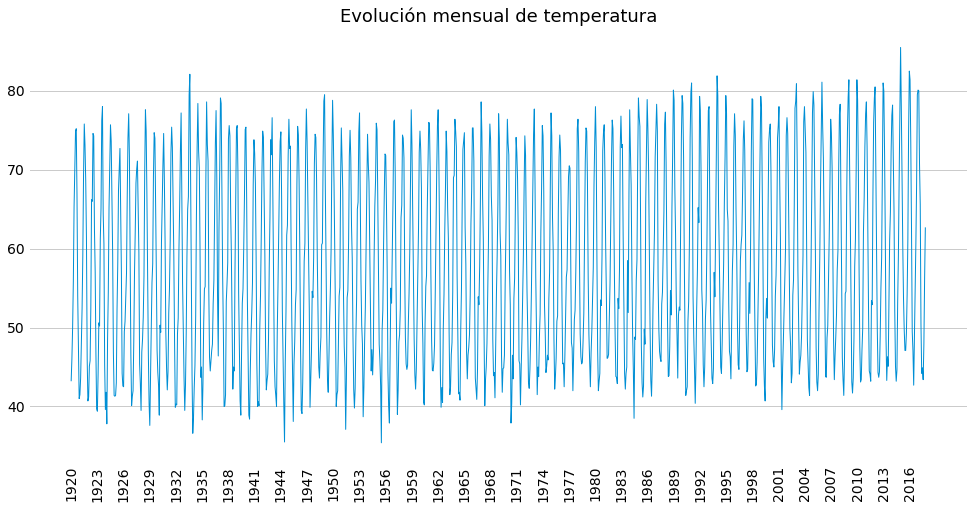

In [11]:
plt.plot(x, retiro['tavg'],lw=1, ls='-', alpha=1, color=sns.color_palette()[0])

plt.grid(axis='y') 
plt.xticks(x[::36], labels[::36], rotation=90)

#plt.legend()
plt.title('Evolución mensual de temperatura',fontsize= 18)
#plt.savefig('images/pasajeros_2017_2018.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

In [12]:

# Eliminamos datos de 2018 por estar incompletos
retiro['year'] = retiro['date'].apply(lambda x : x[0:4])
retiro['month'] = retiro['date'].apply(lambda x : x[5:])
retiro = retiro[retiro['year'] != '2018']

#Convertir de ºF a ºC
retiro['tminc'] = round((retiro['tmin'] -32)/1.8,1)
retiro['tavgc'] = round((retiro['tavg'] -32)/1.8,1)
retiro['tmaxc'] = round((retiro['tmax'] -32)/1.8,1)

retiro.head()

C:\Users\u076515\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\u076515\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,station,name,date,tavg,tmax,tmin,year,month,tminc,tavgc,tmaxc
3396,SP000003195,"MADRID RETIRO, SP",1920-01,43.2,50.5,35.9,1920,01,2.2,6.2,10.3
3397,SP000003195,"MADRID RETIRO, SP",1920-02,46.0,53.4,38.6,1920,02,3.7,7.8,11.9
3398,SP000003195,"MADRID RETIRO, SP",1920-03,50.0,59.2,40.7,1920,03,4.8,10.0,15.1
3399,SP000003195,"MADRID RETIRO, SP",1920-04,55.9,66.0,45.7,1920,04,7.6,13.3,18.9
3400,SP000003195,"MADRID RETIRO, SP",1920-05,65.3,76.9,53.6,1920,05,12.0,18.5,24.9


In [13]:
retiro_year_avg = retiro.groupby(['year'])[['tminc','tavgc','tmaxc']].mean().reset_index()

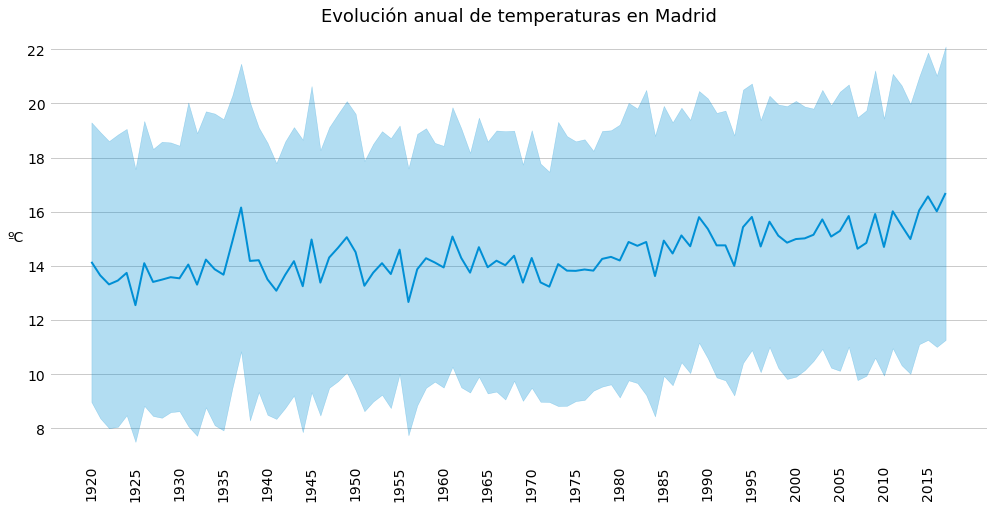

In [14]:
x = retiro_year_avg['year']
y = retiro_year_avg['tavgc']
ymin = retiro_year_avg['tminc']
ymax = retiro_year_avg['tmaxc']

labels = []
# pretty labels
for n in x[::5]:
    labels.append(n)
    for m in range(4):
        labels.append('')

plt.plot(x, y,lw = 2, ls='-', alpha=1, color=sns.color_palette()[0])
plt.fill_between(x, ymin, ymax, alpha=0.3, color=sns.color_palette()[0])

plt.grid(axis='y') 
plt.xticks(x[::5], labels[::5], rotation=90)

#plt.legend()
plt.ylabel('ºC', rotation=0, ha = 'right')

plt.title('Evolución anual de temperaturas en Madrid',fontsize= 18)
plt.savefig('images/temp_anual.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

In [15]:
retiro['despues75']= retiro['year'].apply(lambda x: True if x > '1975' else False )

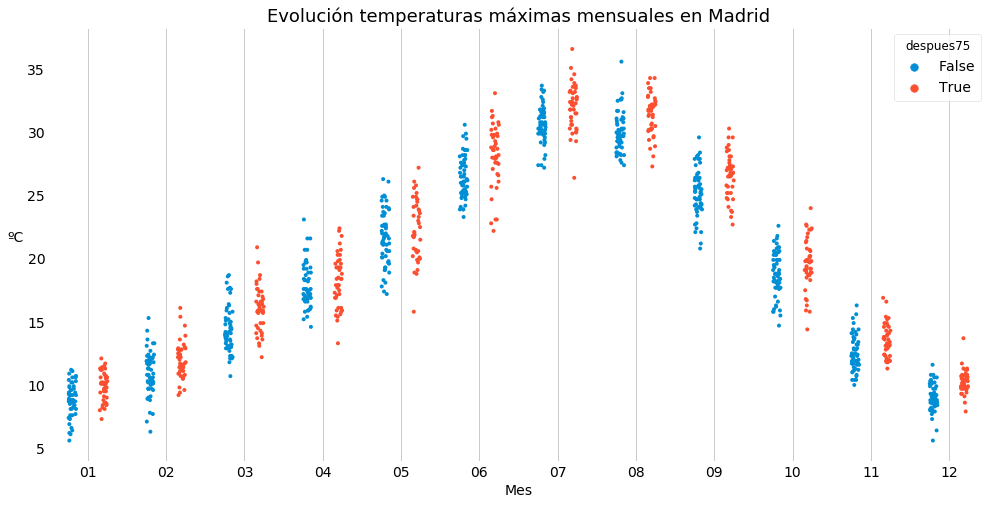

In [16]:
ax = plt.subplot()
sns.stripplot(y='tmaxc',x='month', data=retiro , hue = 'despues75', size = 4, palette=sns.color_palette(),dodge = True)
#ax.set_xticklabels(comunidades, rotation = 90, va='top',fontsize= 12 )
ax.grid(axis='x') 
ax.set_ylabel('ºC', rotation=0, ha = 'right')  
ax.set_xlabel('Mes')
ax.set_title('Evolución temperaturas máximas mensuales en Madrid',fontsize= 18)
plt.savefig('images/temp_max_mes.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

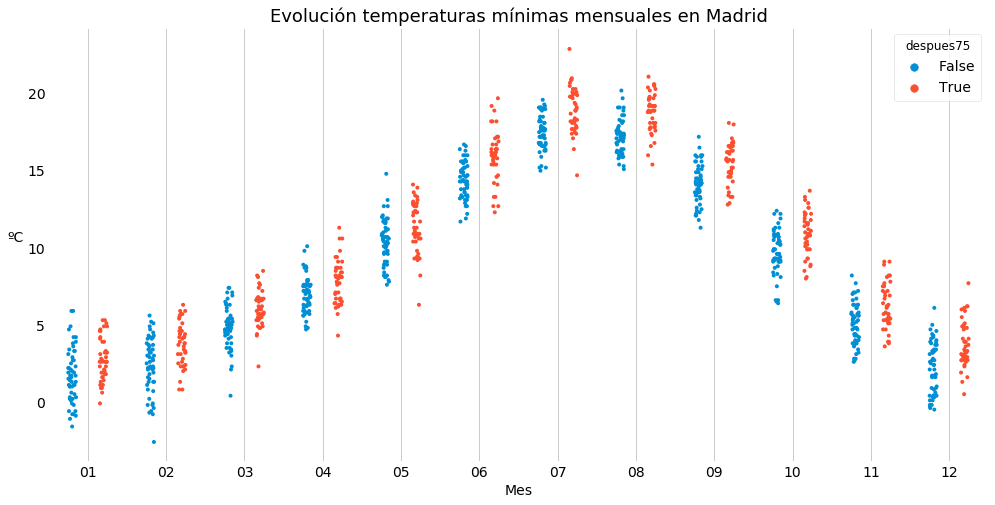

In [17]:
ax = plt.subplot()
sns.stripplot(y='tminc',x='month', data=retiro , hue = 'despues75', size = 4, palette=sns.color_palette(),dodge = True)
#ax.set_xticklabels(comunidades, rotation = 90, va='top',fontsize= 12 )
ax.grid(axis='x') 
ax.set_ylabel('ºC', rotation=0, ha = 'right')  
ax.set_xlabel('Mes')
ax.set_title('Evolución temperaturas mínimas mensuales en Madrid',fontsize= 18)
plt.savefig('images/temp_min_mes.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

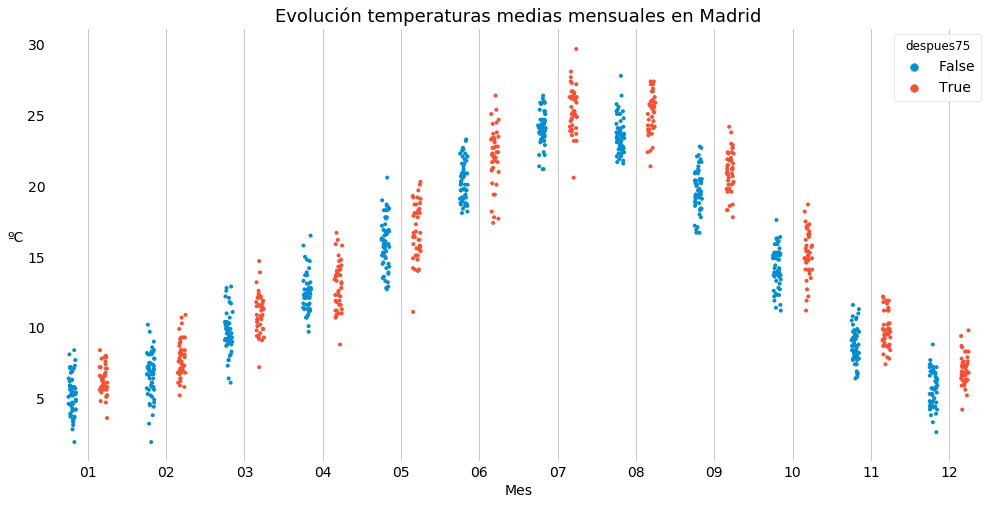

In [18]:
ax = plt.subplot()
sns.stripplot(y='tavgc',x='month', data=retiro , hue = 'despues75', size = 4, palette=sns.color_palette(),dodge = True)
#ax.set_xticklabels(comunidades, rotation = 90, va='top',fontsize= 12 )
ax.grid(axis='x') 
ax.set_ylabel('ºC', rotation=0, ha = 'right')  
ax.set_xlabel('Mes')
ax.set_title('Evolución temperaturas medias mensuales en Madrid',fontsize= 18)
plt.savefig('images/temp_media_mes.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()